# Set Environment

## Install Packages

In [ ]:
!pip3 install numpy==1.19.2
!pip3 install pandas
!pip3 install tensorflow==2.1.0
!pip3 install keras==2.3.1
!pip3 install matplotlib==3.3.2
!pip3 install scikit-learn==0.24.0
print("Packages Installed")

Packages Installed


## Import Packages

In [ ]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
import numpy as np
from keras.models import Sequential
from keras.utils import np_utils
from keras.layers import Dense, Activation , LSTM , Dropout , AveragePooling3D
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

Using TensorFlow backend.


In [ ]:
print(np.__version__)
print(pd.__version__)
print(tf.__version__)
import keras
print(keras.__version__)
import matplotlib as mt
print(mt.__version__)
import sklearn
print(sklearn.__version__)

1.19.2
1.1.5
2.1.0
2.3.1
3.3.2
0.24.0


# Data Preparation

## Import Dataset

In [ ]:
raw_data = pd.read_csv('data.csv')
raw_data.head()

,Unnamed: 0,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,X24,X25,X26,X27,X28,X29,X30,X31,X32,X33,X34,X35,X36,X37,X38,X39,...,X140,X141,X142,X143,X144,X145,X146,X147,X148,X149,X150,X151,X152,X153,X154,X155,X156,X157,X158,X159,X160,X161,X162,X163,X164,X165,X166,X167,X168,X169,X170,X171,X172,X173,X174,X175,X176,X177,X178,y
0,X21.V1.791,135,190,229,223,192,125,55,-9,-33,-38,-10,35,64,113,152,164,127,50,-47,-121,-138,-125,-101,-50,11,39,24,48,64,46,13,-19,-61,-96,-130,-132,-116,-115,-71,...,54,90,111,107,64,32,18,-25,-69,-65,-44,-33,-57,-88,-114,-130,-114,-83,-53,-79,-72,-85,-109,-98,-72,-65,-63,-11,10,8,-17,-15,-31,-77,-103,-127,-116,-83,-51,4
1,X15.V1.924,386,382,356,331,320,315,307,272,244,232,237,258,212,2,-267,-605,-850,-1001,-1109,-1090,-967,-746,-464,-152,118,318,427,473,485,447,397,339,312,314,326,335,332,324,310,...,27,146,229,269,297,307,303,305,306,307,280,231,159,85,51,43,62,63,63,69,89,123,136,127,102,95,105,131,163,168,164,150,146,152,157,156,154,143,129,1
2,X8.V1.1,-32,-39,-47,-37,-32,-36,-57,-73,-85,-94,-99,-94,-96,-104,-103,-92,-75,-69,-69,-53,-37,-14,-10,-39,-78,-102,-98,-80,-54,-40,-35,-39,-32,-13,7,34,41,33,6,...,-82,-107,-126,-124,-108,-84,-68,-61,-56,-63,-62,-33,1,28,45,37,48,62,80,66,23,-11,-39,-44,-42,-45,-48,-42,-6,29,57,64,48,19,-12,-30,-35,-35,-36,5
3,X16.V1.60,-105,-101,-96,-92,-89,-95,-102,-100,-87,-79,-72,-68,-74,-80,-83,-73,-68,-61,-58,-59,-64,-79,-84,-97,-94,-84,-77,-75,-72,-68,-76,-76,-72,-67,-69,-69,-69,-67,-68,...,-69,-66,-74,-69,-61,-51,-45,-45,-49,-58,-64,-78,-80,-90,-87,-83,-78,-64,-38,-22,-29,-42,-51,-68,-71,-69,-69,-74,-74,-80,-82,-81,-80,-77,-85,-77,-72,-69,-65,5
4,X20.V1.54,-9,-65,-98,-102,-78,-48,-16,0,-21,-59,-90,-103,-84,-43,-9,3,-21,-60,-96,-103,-75,-29,14,55,78,73,28,-13,-43,-68,-78,-75,-55,-41,-19,-20,-29,-36,-20,...,38,26,10,-4,-13,-8,0,10,19,29,57,63,45,7,-13,-23,-9,9,11,3,-1,-2,4,18,27,27,14,15,11,10,4,2,-12,-32,-41,-65,-83,-89,-73,5


## Split Dataset into Training Set and Test Set

In [ ]:
# Percentage to split by for training
perc = 90

# Set for training the model
data = raw_data.head(int(len(raw_data)*(perc/100)))

# Set for testing the model later to get the real accuracy
test_set = raw_data.tail(int(len(raw_data)*((100-perc)/100)))

## Format the Data


1.   Split the data into Train and Test sets
2.   Get the data into the right shapes for training


In [ ]:
x_values = data.values[:,1:-1]

y_values = np.array(data['y'])
y_values = np_utils.to_categorical(y_values)

x_train, x_test, y_train, y_test = train_test_split(x_values, y_values, test_size=0.2, random_state=1)

x_train = x_train.reshape(-1, 178, 1)
x_test = x_test.reshape(-1, 178, 1)

print("X Train: {}\nX Test: {}\nY Train: {}\nY Test {}".format(x_train.shape, x_test.shape, y_train.shape, y_test.shape))

X Train: (8280, 178, 1)
X Test: (2070, 178, 1)
Y Train: (8280, 6)
Y Test (2070, 6)


## Visiualize the Data

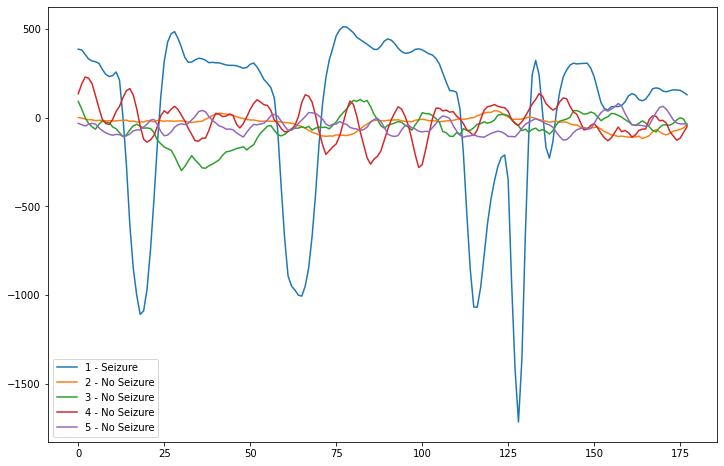

In [ ]:
# Set the size of the chart
plt.figure(figsize=(12,8))

# Plot data labeled 1 - Seizure
plt.plot(x_values[1, :], label="1 - Seizure")

# Plot data labeled 2 - No Seizure
plt.plot(x_values[7, :], label="2 - No Seizure")

# Plot data labeled 3 - No Seizure
plt.plot(x_values[12, :], label="3 - No Seizure")

# Plot data labeled 4 - No Seizure
plt.plot(x_values[0, :], label="4 - No Seizure")

# Plot data labeled 5 - No Seizure
plt.plot(x_values[2, :], label="5 - No Seizure")

# Create a legend and output the graph
plt.legend()
plt.show()

# Training Model

## Create a LSTM Model

In [ ]:
# Create a Sequential LSTM model
model = Sequential()
model.add(LSTM(56, input_shape=(45, 1), return_sequences=True))
model.add(Dropout(0.3))
model.add(LSTM(56))
model.add(Dropout(0.3))
model.add(Dense(20))
model.add(Activation('tanh'))
model.add(Dense(5))
model.add(Activation('softmax'))

# Output the model summary
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 45, 56)            12992     
_________________________________________________________________
dropout_1 (Dropout)          (None, 45, 56)            0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 56)                25312     
_________________________________________________________________
dropout_2 (Dropout)          (None, 56)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 20)                1140      
_________________________________________________________________
activation_1 (Activation)    (None, 20)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 5)                

## Train the LSTM Model

In [ ]:
# Define the variables for training
model.compile(
    loss = "binary_crossentropy",
    optimizer = "adam",
    metrics = ["accuracy"]
)

# Train the model
hist = model.fit(
    x = np.asarray((x_train[:, ::4] - x_train.mean()) / x_train.std()).astype(np.float32),
    y = np.asarray(y_train[:, 1:]).astype(np.float32),
    validation_data = (
        (x_test[:, ::4] - x_test.mean()) / x_test.std(),
        y_test[:, 1:]
    ),
    epochs = 100,
    batch_size = 15,
    shuffle = False
)

Train on 8280 samples, validate on 2070 samples
Epoch 1/100
8280/8280 [==============================] - 42s 5ms/step - loss: 0.4007 - accuracy: 0.8289 - val_loss: 0.3764 - val_accuracy: 0.8331
Epoch 2/100
8280/8280 [==============================] - 43s 5ms/step - loss: 0.3710 - accuracy: 0.8345 - val_loss: 0.3337 - val_accuracy: 0.8480
Epoch 3/100
8280/8280 [==============================] - 44s 5ms/step - loss: 0.3290 - accuracy: 0.8462 - val_loss: 0.2870 - val_accuracy: 0.8563
Epoch 4/100
8280/8280 [==============================] - 42s 5ms/step - loss: 0.2873 - accuracy: 0.8575 - val_loss: 0.2618 - val_accuracy: 0.8671
Epoch 5/100
8280/8280 [==============================] - 42s 5ms/step - loss: 0.2626 - accuracy: 0.8655 - val_loss: 0.2462 - val_accuracy: 0.8700
Epoch 6/100
8280/8280 [==============================] - 42s 5ms/step - loss: 0.2466 - accuracy: 0.8725 - val_loss: 0.2365 - val_accuracy: 0.8741
Epoch 7/100
8280/8280 [==============================] - 42s 5ms/step - loss

## Save the Model

In [ ]:
model.save("New_Seizure_Detector.h5")

## Visualize Model's Accuracy Metrics


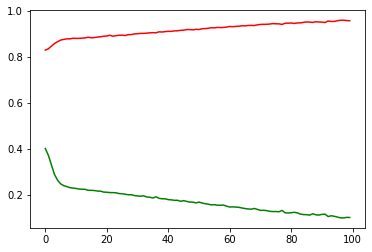

In [ ]:
# Plot Training Loss and Accuracy of the Model
plt.figure(0)
plt.plot(hist.history['loss'],'green')
plt.plot(hist.history['accuracy'], 'red')
plt.show()

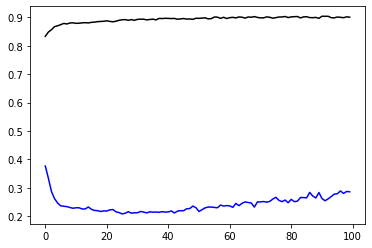

In [ ]:
# Plot Validation Loss and Accuracy of the Model
plt.figure(0)
plt.plot(hist.history['val_loss'],'blue')
plt.plot(hist.history['val_accuracy'], 'black')
plt.show()

# Validate Accuracy of the Model

## Import Packages

In [ ]:
from keras.models import load_model, Sequential
from keras.utils import np_utils
from keras.layers import Dense, Activation, LSTM, Dropout, AveragePooling3D
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Load the Model

In [ ]:
model = load_model("New_Seizure_Detector.h5")

## Split the Test Set

In [ ]:
x_test_values = test_set.values[:,1:-1]

y_test_values = np.array(test_set['y'])
y_test_values = np_utils.to_categorical(y_test_values)

x_test_values = x_test_values.reshape(-1, 178, 1)

print("x_test_values Shape: {}\ny_test_values Shape: {}".format(x_test_values.shape, y_test_values.shape))

x_test_values Shape: (1150, 178, 1)
y_test_values Shape: (1150, 6)


## Predict

In [ ]:
predictions = model.predict((x_test_values[:, ::4] - x_test_values.mean()) / x_test_values.std())

## Format the Data

1.   Get the data into the right input shapes for the predictions


In [ ]:
y_pred = np.zeros((y_test_values.shape[0]))
y_truth = np.ones((y_test_values.shape[0]))

for i in range(y_test_values.shape[0]):
    y_pred[i] = np.argmax(predictions[i]) + 1
    y_truth[i] = np.argmax(y_test_values[i])

for i in range(y_test_values.shape[0]):
    if y_truth[i] != 1:
        y_truth[i] = 0
    if y_pred[i] != 1:
        y_pred[i] = 0


## Get the Accuracy

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_truth, y_pred)

0.9904347826086957

# Test the new Model
##### We test the model by giving it data from the real dataset and then we will validate the result by comparing it against the y label.

## Import Packages

In [ ]:
from keras.models import load_model, Sequential
from keras.utils import np_utils
from keras.layers import Dense, Activation, LSTM, Dropout, AveragePooling3D
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Load the Model

In [ ]:
model = load_model("New_Seizure_Detector.h5")

## Load & Read the Dataset

In [ ]:
data = pd.read_csv('data.csv')
data.head()

,Unnamed: 0,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,X24,X25,X26,X27,X28,X29,X30,X31,X32,X33,X34,X35,X36,X37,X38,X39,...,X140,X141,X142,X143,X144,X145,X146,X147,X148,X149,X150,X151,X152,X153,X154,X155,X156,X157,X158,X159,X160,X161,X162,X163,X164,X165,X166,X167,X168,X169,X170,X171,X172,X173,X174,X175,X176,X177,X178,y
0,X21.V1.791,135,190,229,223,192,125,55,-9,-33,-38,-10,35,64,113,152,164,127,50,-47,-121,-138,-125,-101,-50,11,39,24,48,64,46,13,-19,-61,-96,-130,-132,-116,-115,-71,...,54,90,111,107,64,32,18,-25,-69,-65,-44,-33,-57,-88,-114,-130,-114,-83,-53,-79,-72,-85,-109,-98,-72,-65,-63,-11,10,8,-17,-15,-31,-77,-103,-127,-116,-83,-51,4
1,X15.V1.924,386,382,356,331,320,315,307,272,244,232,237,258,212,2,-267,-605,-850,-1001,-1109,-1090,-967,-746,-464,-152,118,318,427,473,485,447,397,339,312,314,326,335,332,324,310,...,27,146,229,269,297,307,303,305,306,307,280,231,159,85,51,43,62,63,63,69,89,123,136,127,102,95,105,131,163,168,164,150,146,152,157,156,154,143,129,1
2,X8.V1.1,-32,-39,-47,-37,-32,-36,-57,-73,-85,-94,-99,-94,-96,-104,-103,-92,-75,-69,-69,-53,-37,-14,-10,-39,-78,-102,-98,-80,-54,-40,-35,-39,-32,-13,7,34,41,33,6,...,-82,-107,-126,-124,-108,-84,-68,-61,-56,-63,-62,-33,1,28,45,37,48,62,80,66,23,-11,-39,-44,-42,-45,-48,-42,-6,29,57,64,48,19,-12,-30,-35,-35,-36,5
3,X16.V1.60,-105,-101,-96,-92,-89,-95,-102,-100,-87,-79,-72,-68,-74,-80,-83,-73,-68,-61,-58,-59,-64,-79,-84,-97,-94,-84,-77,-75,-72,-68,-76,-76,-72,-67,-69,-69,-69,-67,-68,...,-69,-66,-74,-69,-61,-51,-45,-45,-49,-58,-64,-78,-80,-90,-87,-83,-78,-64,-38,-22,-29,-42,-51,-68,-71,-69,-69,-74,-74,-80,-82,-81,-80,-77,-85,-77,-72,-69,-65,5
4,X20.V1.54,-9,-65,-98,-102,-78,-48,-16,0,-21,-59,-90,-103,-84,-43,-9,3,-21,-60,-96,-103,-75,-29,14,55,78,73,28,-13,-43,-68,-78,-75,-55,-41,-19,-20,-29,-36,-20,...,38,26,10,-4,-13,-8,0,10,19,29,57,63,45,7,-13,-23,-9,9,11,3,-1,-2,4,18,27,27,14,15,11,10,4,2,-12,-32,-41,-65,-83,-89,-73,5


## Format the Data

1.   Get the data into the right input shapes for the predictions


In [ ]:
x_values = data.values[:,1:-1].reshape(-1, 178, 1)
y_values = np.array(data['y'])
y_values = np_utils.to_categorical(y_values)

row_num = 503
row = x_values[row_num].reshape(-1, 178, 1)
print("Row Number: {}\nRow Shape: {}".format(row_num, row.shape))

Row Number: 503
Row Shape: (1, 178, 1)


In [ ]:
x_values = np.array(data2["AF7"][0:178]).reshape(-1, 178, 1)

## Predict

In [ ]:
# Pass the data into the model and retrieve predictions
predictions = model.predict(
    (row[:, ::4] - x_values.mean()) / x_values.std()
)

# Normalize the predicitons
result = np.argmax(predictions[0]) + 1

## Output Result

In [ ]:
if result == 1:
    result_str = "Seizure Detected"
else:
    result_str = "No Seizure Detected"

result_str = result_str + " and Exact Category: " + str(result)

print(result_str)

No Seizure Detected and Exact Category: 4
